In [300]:
import numpy as np

In [301]:
from PIL import Image, ImageDraw

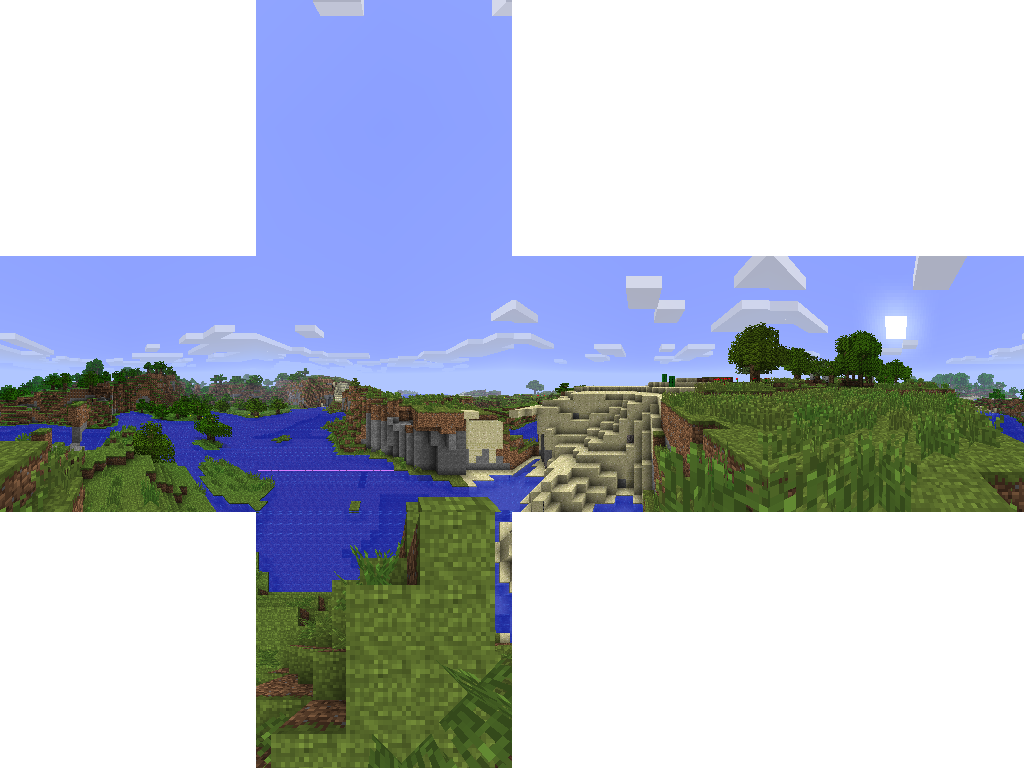

In [302]:
im = Image.open("src.png")
draw = ImageDraw.Draw(im) 
im

In [309]:
# origin block

originx = 61
originy = 74
originz = -69

# approximate values
xoff=-0.24
yoff=1.62
zoff=0.01
coff=0.09387 # calculated by best fit, this is "camera offset" behind eye position


# magic (90 FOV)
m1=128


In [310]:
# helper funtions
# todo: better naming

scale = 4

def getcorner(v,h,d):
    if d > 0:
        return (np.nan,np.nan)
    vpxl = (128-v/d*-m1)
    if vpxl > 255+5:
        vpxl = np.nan
    if vpxl < 0-5:
        vpxl = np.nan
    hpxl = (h/d*-m1+128)
    if hpxl > 255+5:
        hpxl = np.nan
    if hpxl < 0-5:
        hpxl = np.nan
    #print(vpxl,hpxl)
    return (vpxl,hpxl)

def getcornerbottom(x,y,z):
    vpxl,hpxl = getcorner(x-xoff,z-zoff,y-yoff-coff)
    return ((vpxl+256*2)*scale,(hpxl+256)*scale)

def getcornerfront(x,y,z):
    vpxl,hpxl = getcorner(y-yoff,z-zoff,-x+xoff-coff)
    return ((vpxl+256)*scale,(hpxl+256)*scale)

def getcornerleft(x,y,z):
    vpxl,hpxl = getcorner(y-yoff,x-xoff,+z-zoff-coff)
    return ((vpxl+256)*scale,(hpxl+256*0)*scale)

def getcornerright(x,y,z):
    vpxl,hpxl = getcorner(y-yoff,-x+xoff,-z+zoff-coff)
    return ((vpxl+256)*scale,(hpxl+256*2)*scale)

def getcornerback(x,y,z):
    vpxl,hpxl = getcorner(y-yoff,-z+zoff,+x-xoff-coff)
    return ((vpxl+256)*scale,(hpxl+256*3)*scale)

def drawTop(draw,x,z,y):
    
    v1,h1 = getcornerfront(x+0.5,y,z+0.5)
    v2,h2 = getcornerfront(x-0.5,y,z+0.5)
    v3,h3 = getcornerfront(x-0.5,y,z-0.5)
    v4,h4 = getcornerfront(x+0.5,y,z-0.5)
    
    drawlines(draw,h1,v1,h2,v2,h3,v3,h4,v4,y)
    
    v1,h1 = getcornerbottom(x+0.5,y,z+0.5)
    v2,h2 = getcornerbottom(x-0.5,y,z+0.5)
    v3,h3 = getcornerbottom(x-0.5,y,z-0.5)
    v4,h4 = getcornerbottom(x+0.5,y,z-0.5)
    
    drawlines(draw,h1,v1,h2,v2,h3,v3,h4,v4,y)
    
    v1,h1 = getcornerleft(x+0.5,y,z+0.5)
    v2,h2 = getcornerleft(x-0.5,y,z+0.5)
    v3,h3 = getcornerleft(x-0.5,y,z-0.5)
    v4,h4 = getcornerleft(x+0.5,y,z-0.5)
    
    drawlines(draw,h1,v1,h2,v2,h3,v3,h4,v4,y)
    
    v1,h1 = getcornerright(x+0.5,y,z+0.5)
    v2,h2 = getcornerright(x-0.5,y,z+0.5)
    v3,h3 = getcornerright(x-0.5,y,z-0.5)
    v4,h4 = getcornerright(x+0.5,y,z-0.5)
    
    drawlines(draw,h1,v1,h2,v2,h3,v3,h4,v4,y)
    
    v1,h1 = getcornerback(x+0.5,y,z+0.5)
    v2,h2 = getcornerback(x-0.5,y,z+0.5)
    v3,h3 = getcornerback(x-0.5,y,z-0.5)
    v4,h4 = getcornerback(x+0.5,y,z-0.5)
    
    drawlines(draw,h1,v1,h2,v2,h3,v3,h4,v4,y)


def drawlines(draw,h1,v1,h2,v2,h3,v3,h4,v4,y):
    color = ['red','orange','yellow','green','blue','purple'][y%6]
    if np.isfinite([h1,v1,h2,v2]).all():
        draw.line((h1,v1,h2,v2), fill=color)
    if np.isfinite([h2,v2,h3,v3]).all():
        draw.line((h2,v2,h3,v3), fill=color)
    if np.isfinite([h3,v3,h4,v4]).all():
        draw.line((h3,v3,h4,v4), fill=color)
    if np.isfinite([h4,v4,h1,v1]).all():
        draw.line((h4,v4,h1,v1), fill=color)
    
# use this function:
def topface(draw,x,y,z):
    drawTop(draw,x-originx,z-originz,y-originy)

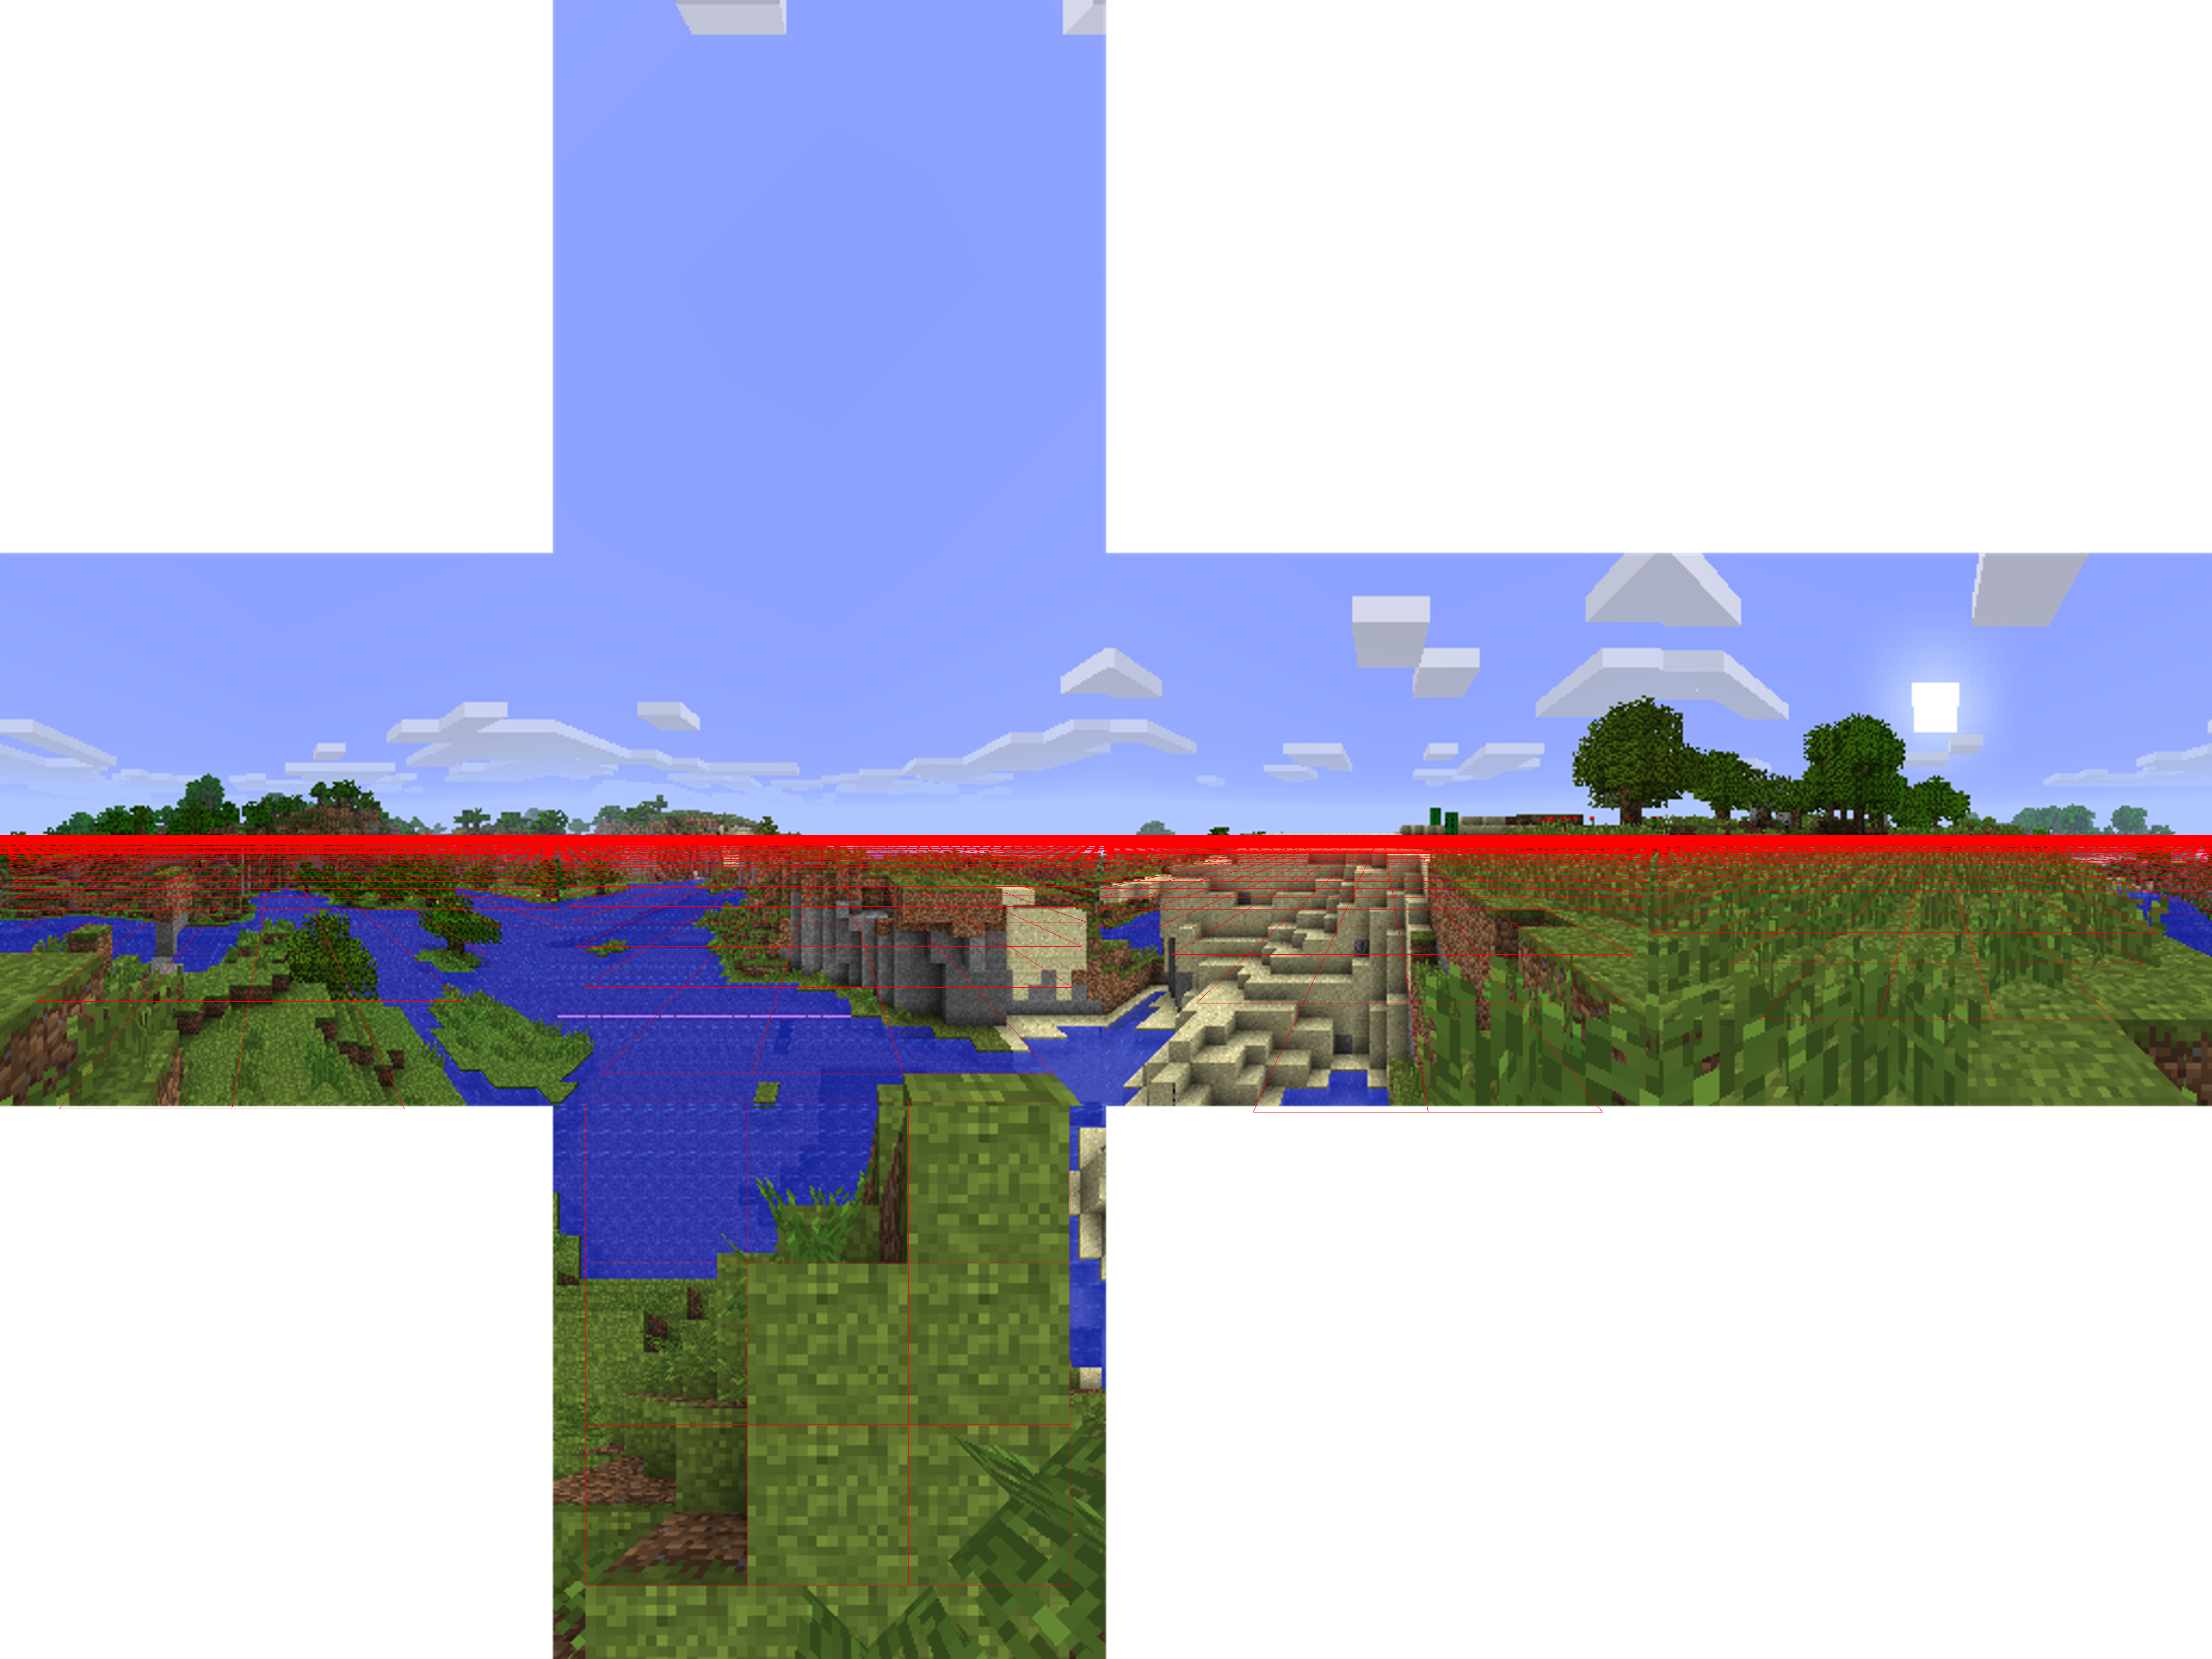

In [323]:
im = Image.open("src.png")

im = im.resize((256*scale*4,256*scale*3))#,resample=Image.NEAREST)

draw = ImageDraw.Draw(im) 

# list of known block coords
coords = [
( 61 , 74 , -69 ),
( 61 , 74 , -68 ),
( 62 , 74 , -68 ),
( 60 , 74 , -69 ),
( 60 , 74 , -68 ),
( 59 , 74 , -70 ),
( 59 , 74 , -69 ),
( 59 , 74 , -68 ),
( 62 , 73 , -69 ),
( 63 , 73 , -68 ),
( 60 , 73 , -70 ),
( 59 , 73 , -71 ),
( 59 , 73 , -72 ),
( 62 , 72 , -70 ),
( 61 , 72 , -70 ),
( 60 , 72 , -71 ),
( 61 , 71 , -71 ),
( 60 , 71 , -72 ),
( 59 , 71 , -73 ),
( 61 , 70 , -72 ),
( 62 , 70 , -71 ),
( 60 , 70 , -73 ),
( 61 , 69 , -73 ),
( 61 , 69 , -74 ),
( 61 , 69 , -75 ),
( 61 , 69 , -76 ),
( 62 , 69 , -74 ),
( 62 , 69 , -75 ),
( 62 , 69 , -76 ),
( 60 , 69 , -74 ),
( 60 , 69 , -75 ),
( 59 , 69 , -75 ),
( 62 , 68 , -73 ),
( 62 , 68 , -72 ),
( 64 , 65 , -75 ),
( 63 , 65 , -75 ),
( 64 , 65 , -76 ),
( 64 , 65 , -77 ),
( 64 , 65 , -78 ),
( 64 , 65 , -79 ),
( 64 , 64 , -74 ),
( 65 , 64 , -81 ),
( 69 , 64 , -57 ),
( 65 , 63 , -74 ),
( 65 , 63 , -75 ),
( 65 , 63 , -76 ),
( 65 , 63 , -77 ),
( 65 , 63 , -78 ),
( 65 , 63 , -79 ),
( 65 , 63 , -80 ),
( 66 , 63 , -81 ),
( 67 , 63 , -81 ),
( 66 , 63 , -82 ),
( 67 , 63 , -82 ),
( 68 , 63 , -82 ),
( 69 , 63 , -82 ),
( 74 , 63 , -72 ),
( 74 , 63 , -82 ),
( 61 , 63 , -57 ),
( 61 , 63 , -58 ),
( 67 , 63 , -57 ),
( 68 , 63 , -57 ),
( 69 , 63 , -58 ),
( 70 , 63 , -58 ),
( 71 , 63 , -57 ),
( 72 , 63 , -57 ),
]


# water y level = 63
# player foot level = 74

# if we want to instead draw lots of blocks at a given y-level 
coords = []
for i in range(originx-80,originx+80):
    for j in range(originz-80,originz+80):
        coords.append((i,74,j))
        pass

# colors cycle through the rainbow
# make sure you look at the right color for the right y-level
# yellow above orange, then red, etc.
# e.g. if there's red and purple, red is on top because of the cycle

for coord in coords:
    # optionally draw only a single y-level
    if coord[1]==63 or True:
        topface(draw,coord[0],coord[1],coord[2])
        pass
    pass

#im.crop([256,256*2,256*2,256*3]).resize((256*3,256*3))
im

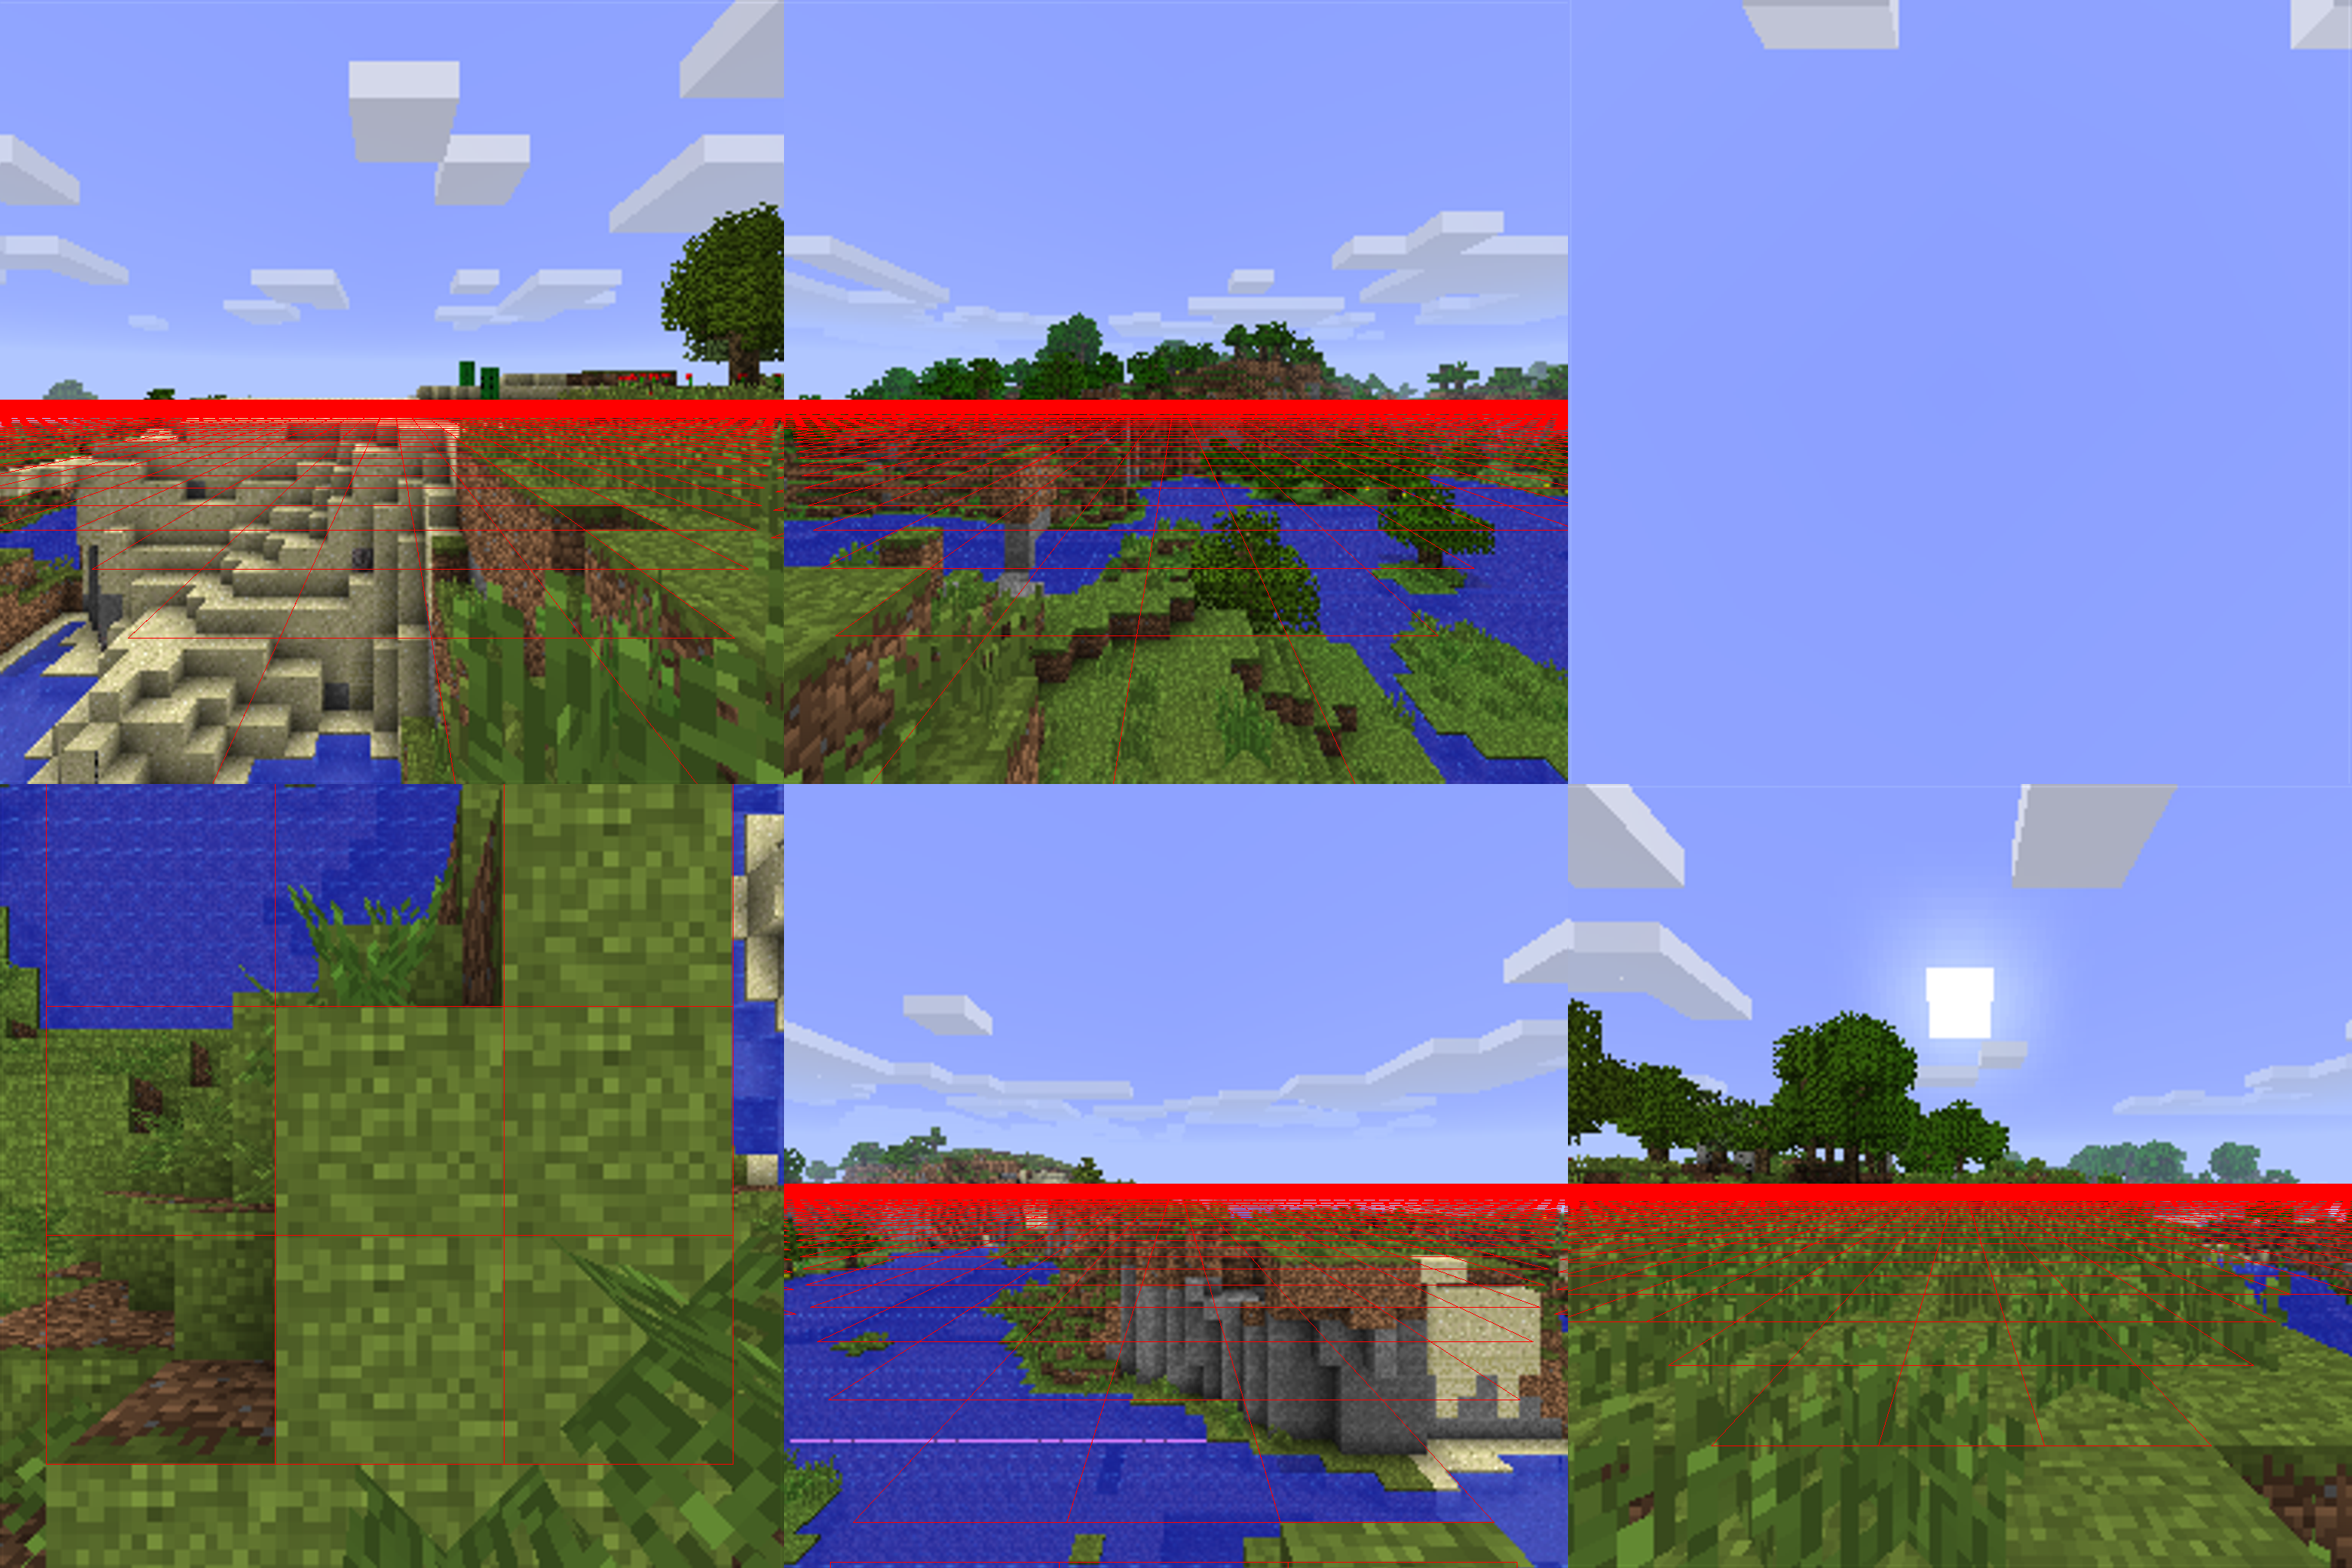

In [321]:
# convert to cube viewer format

imb = Image.new('RGB',(256*scale*3,256*scale*2))

bottom = im.crop([256*scale,256*2*scale,256*2*scale,256*3*scale])
imb.paste(bottom,(256*scale*0,256*scale*1))
front = im.crop([256*scale,256*1*scale,256*2*scale,256*2*scale])
imb.paste(front,(256*scale*1,256*scale*1))
back = im.crop([256*scale*3,256*1*scale,256*4*scale,256*2*scale])
imb.paste(back,(256*scale*2,256*scale*1))
top = im.crop([256*scale,256*0*scale,256*2*scale,256*1*scale])
imb.paste(top,(256*scale*2,256*scale*0))
left = im.crop([256*scale*0,256*1*scale,256*1*scale,256*2*scale])
imb.paste(left,(256*scale*1,256*scale*0))
right = im.crop([256*scale*2,256*1*scale,256*3*scale,256*2*scale])
imb.paste(right,(256*scale*0,256*scale*0))

imb